# **Data Exploration and analysis using the Kaggle Dataset without any enhancements**

## Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import re
import warnings

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

In [3]:
# Load the dataset
netflix_data = pd.read_csv('data/netflix_titles.csv')

# 1. Basic Dataset Information
print(f"Dataset Shape: {netflix_data.shape}")
print("\nDataset Information:")
netflix_data.info()

Dataset Shape: (8807, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# 2. Check for missing values
print("\nMissing Values:")
missing_values = netflix_data.isnull().sum().sort_values(ascending=False)
missing_percent = (netflix_data.isnull().sum() / netflix_data.shape[0] * 100).sort_values(ascending=False)
missing_df = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing Values', 'Percentage'])
missing_df.head(10)


Missing Values:


,Missing Values,Percentage
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


In [6]:
# 3. Statistical Summary
print("\nStatistical Summary:")
netflix_data.describe(include='all')


Statistical Summary:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


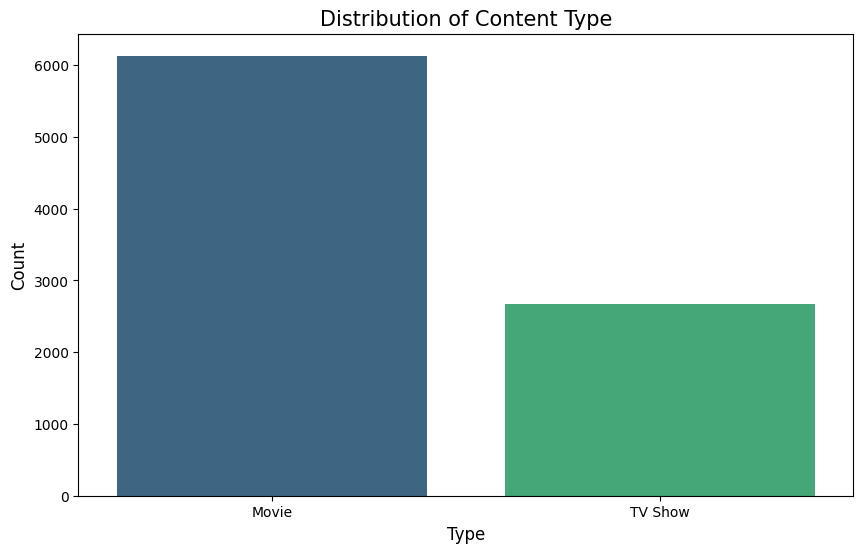

In [7]:
# 4. Content Type Distribution (Movies vs TV Shows)
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=netflix_data, palette='viridis')
plt.title('Distribution of Content Type', fontsize=15)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

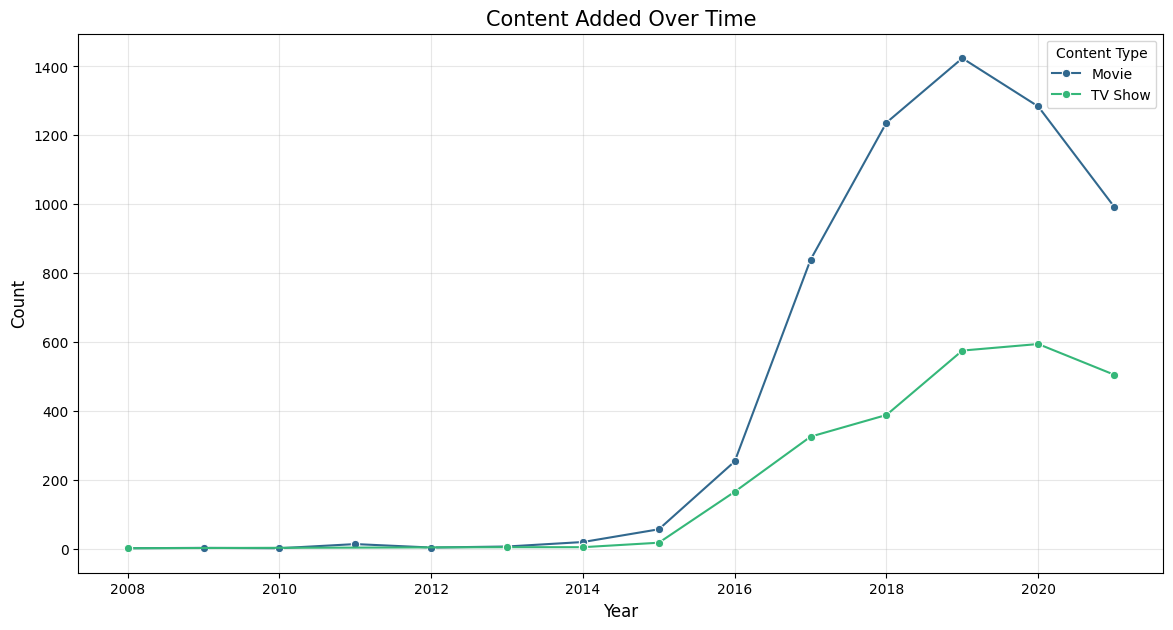

In [8]:
# 5. Content Added Over Time
# Convert date_added to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Extract year and month from date_added
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month

# Group by year_added and type
yearly_content = netflix_data.groupby(['year_added', 'type']).size().reset_index(name='count')

# Plot content added over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_content, x='year_added', y='count', hue='type', marker='o', palette='viridis')
plt.title('Content Added Over Time', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Content Type', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

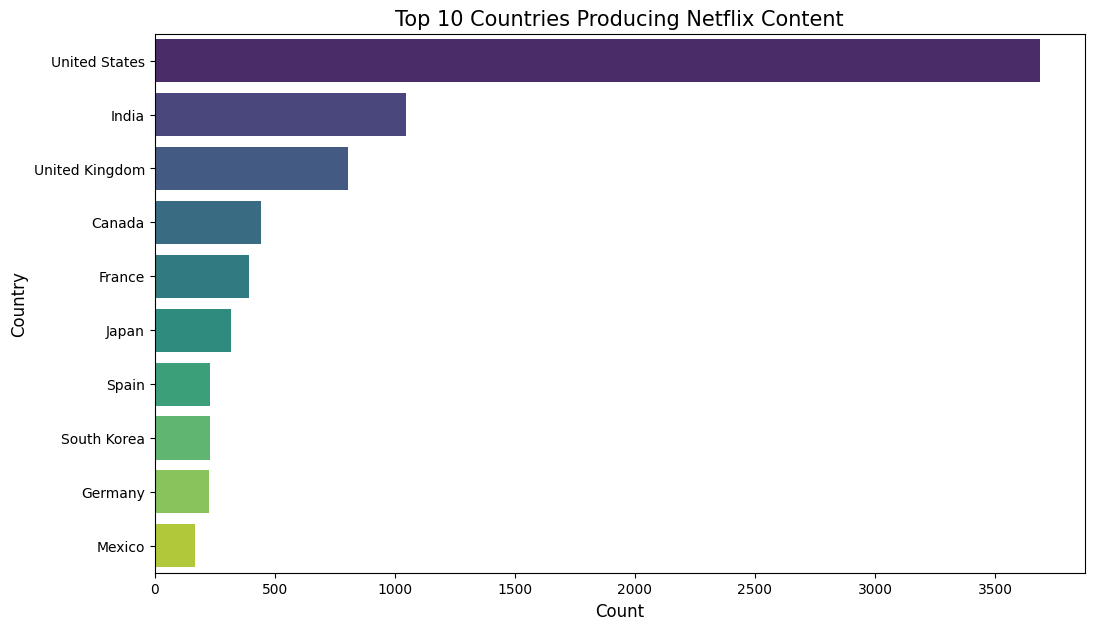

In [9]:
# 6. Top 10 Countries Producing Netflix Content
# Split countries and explode the dataframe
netflix_data['country_split'] = netflix_data['country'].str.split(', ')
netflix_country_exploded = netflix_data.explode('country_split')

# Count content by country
country_counts = netflix_country_exploded['country_split'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts = country_counts.head(10)  # Top 10 countries

# Plot top 10 countries
plt.figure(figsize=(12, 7))
sns.barplot(data=country_counts, x='Count', y='Country', palette='viridis')
plt.title('Top 10 Countries Producing Netflix Content', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

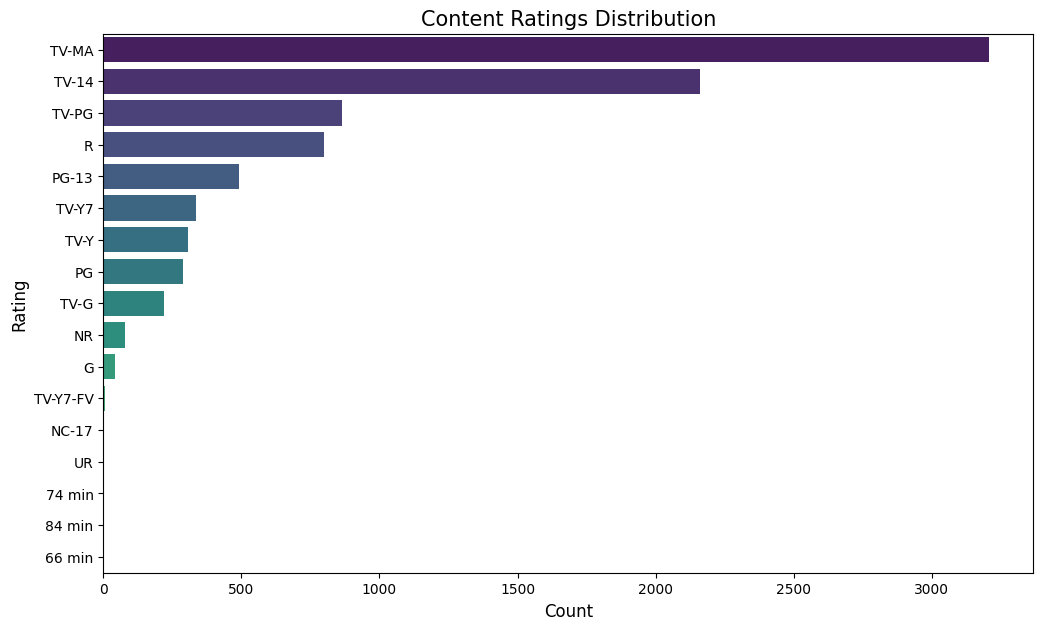

In [10]:
# 7. Content Ratings Distribution
plt.figure(figsize=(12, 7))
sns.countplot(y='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='viridis')
plt.title('Content Ratings Distribution', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

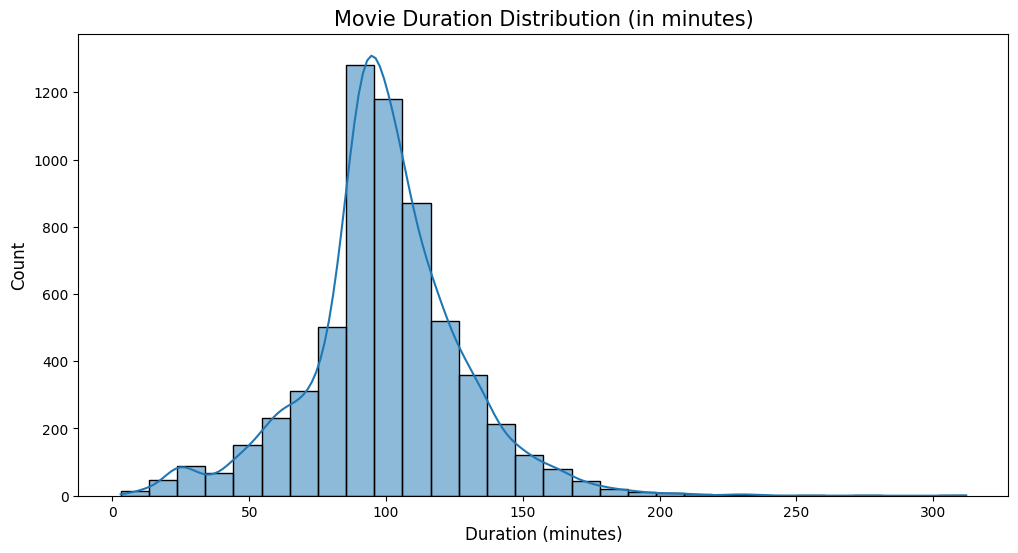

In [11]:
# 8. Duration Analysis
# For Movies: Extract numeric duration
netflix_data['duration_numeric'] = netflix_data['duration'].str.extract('(\d+)').astype(float)

# Separate movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Plot movie duration distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=movies, x='duration_numeric', bins=30, kde=True, palette='viridis')
plt.title('Movie Duration Distribution (in minutes)', fontsize=15)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

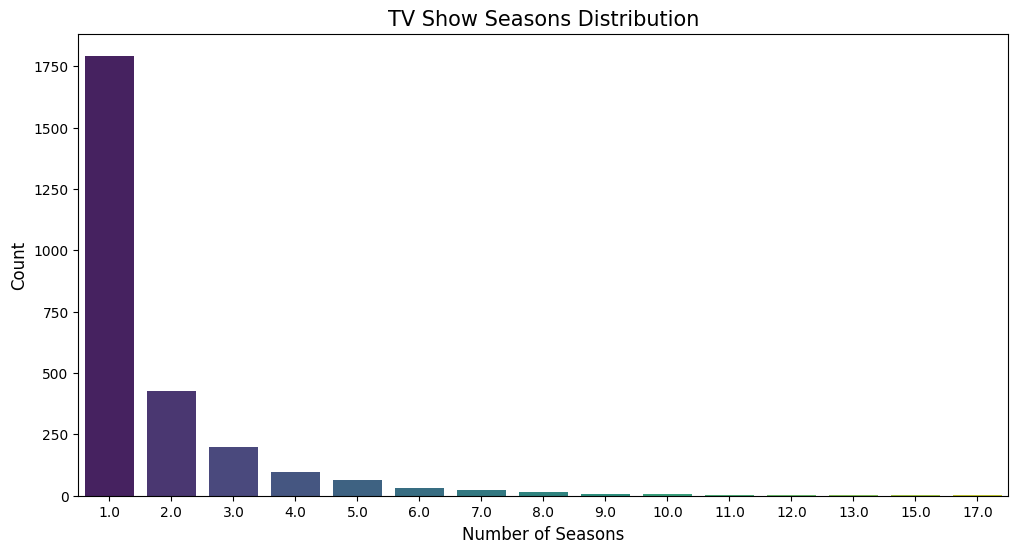

In [12]:
# 9. TV Show Seasons Distribution
# Extract number of seasons for TV shows
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Plot TV show seasons distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='seasons', data=tv_shows, palette='viridis')
plt.title('TV Show Seasons Distribution', fontsize=15)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

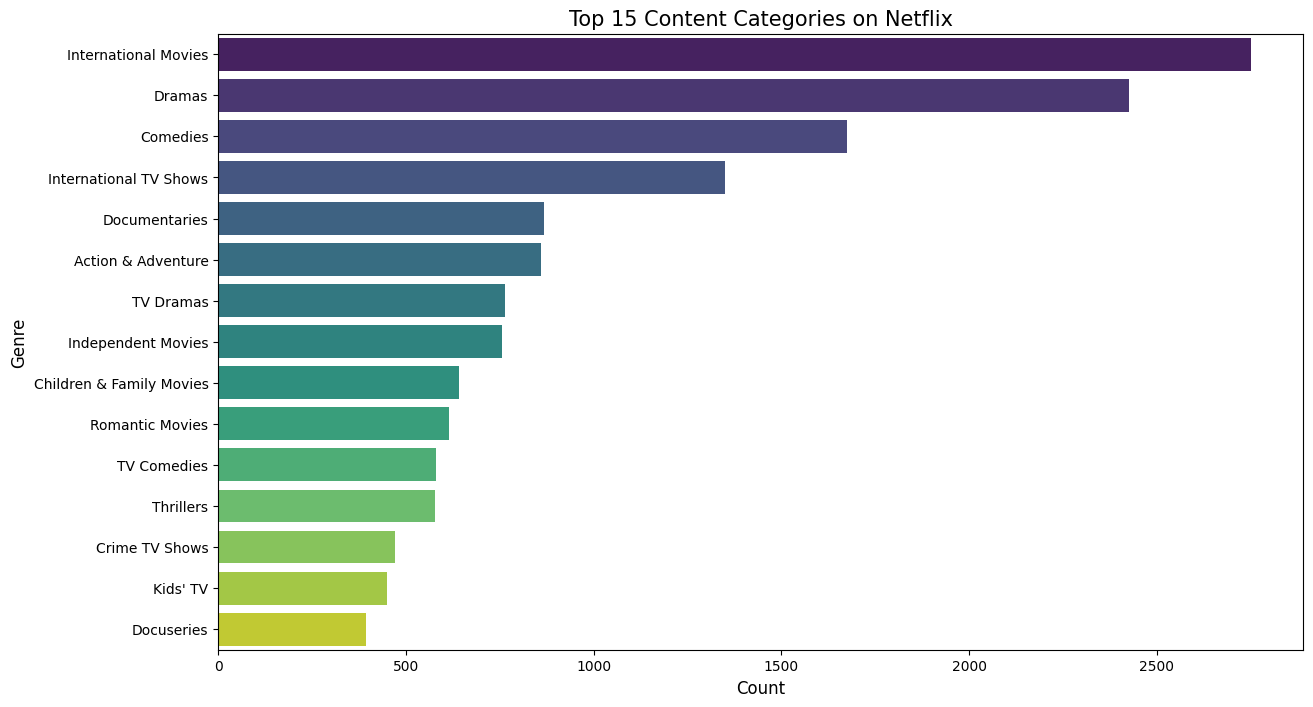

In [13]:
# 10. Content Categories Analysis
# Split genres and explode the dataframe
netflix_data['listed_in_split'] = netflix_data['listed_in'].str.split(', ')
netflix_genres_exploded = netflix_data.explode('listed_in_split')

# Count content by genre
genre_counts = netflix_genres_exploded['listed_in_split'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts = genre_counts.head(15)  # Top 15 genres

# Plot top 15 genres
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_counts, x='Count', y='Genre', palette='viridis')
plt.title('Top 15 Content Categories on Netflix', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

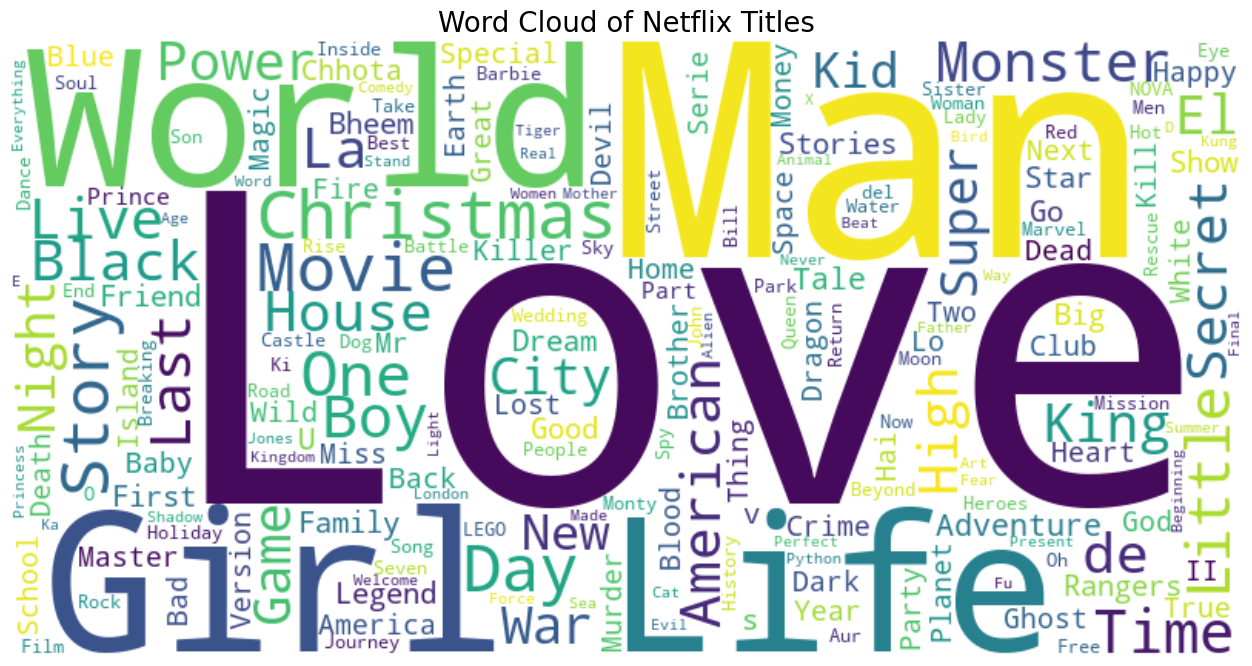

In [14]:
# 11. Word Cloud of Movie/Show Titles
from wordcloud import WordCloud

# Create word cloud for titles
plt.figure(figsize=(16, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     max_words=200, colormap='viridis', 
                     collocations=False).generate(' '.join(netflix_data['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles', fontsize=20)
plt.show()

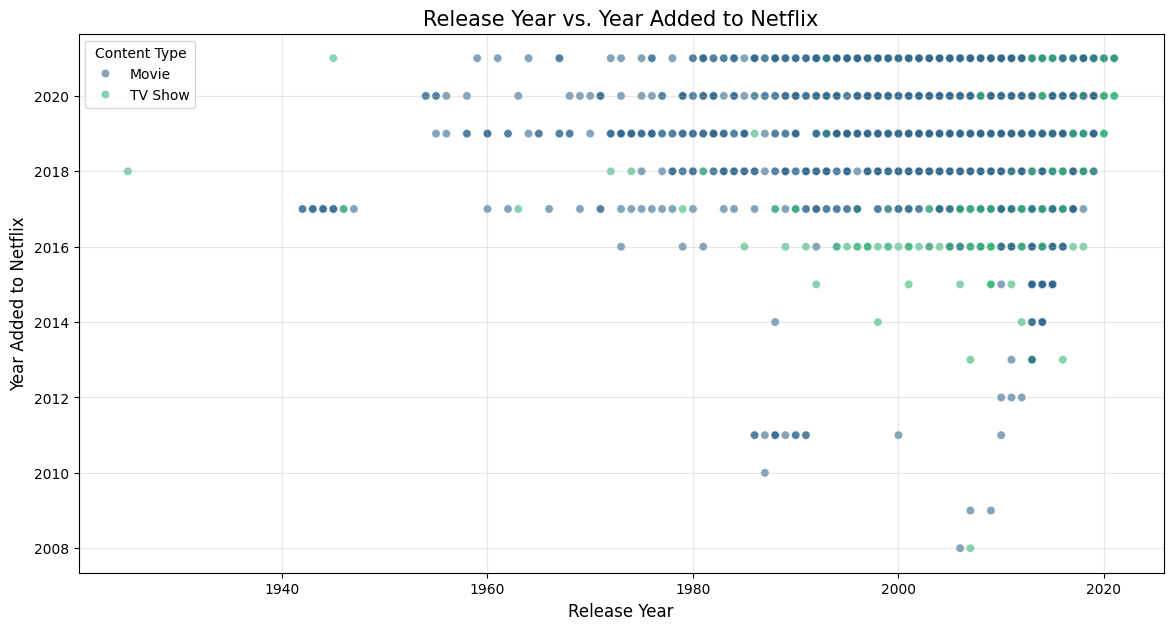

In [15]:
# 12. Release Year vs. Added Year Analysis
plt.figure(figsize=(14, 7))
sns.scatterplot(data=netflix_data.dropna(subset=['year_added']), 
               x='release_year', y='year_added', hue='type', 
               alpha=0.6, palette='viridis')
plt.title('Release Year vs. Year Added to Netflix', fontsize=15)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Year Added to Netflix', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Content Type', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

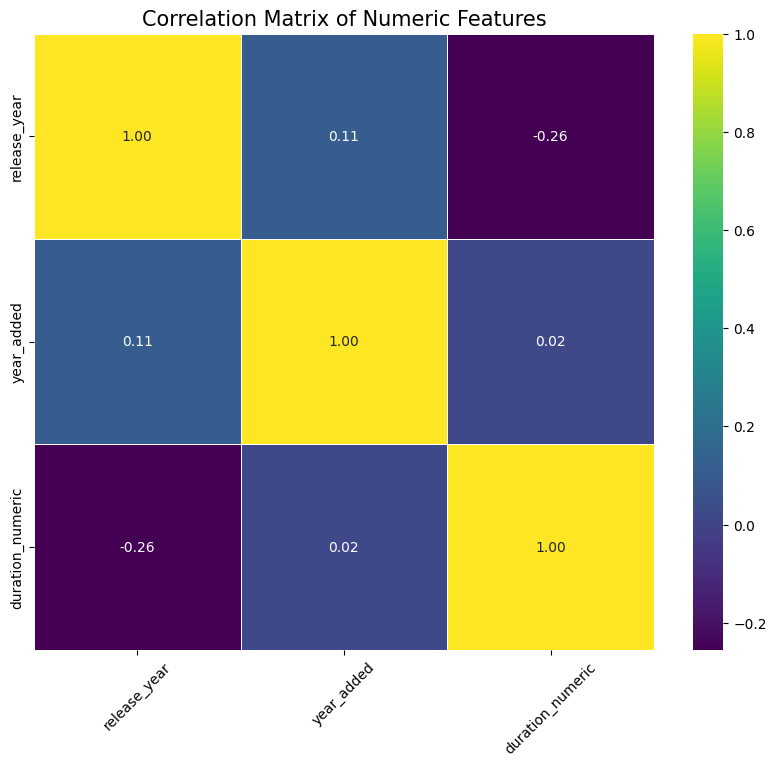

In [16]:
# 13. Correlation Analysis for Numeric Features
# Create a correlation matrix for numeric features
numeric_data = netflix_data[['release_year', 'year_added', 'duration_numeric']].dropna()
corr_matrix = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

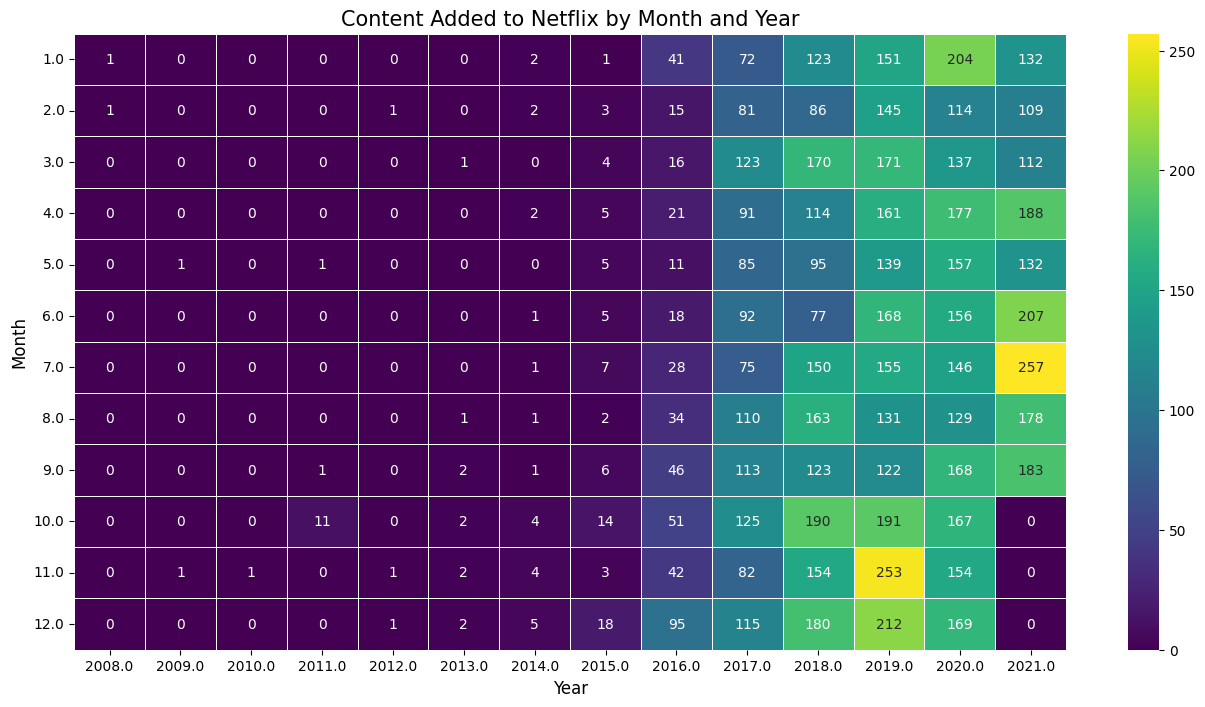

In [17]:
# 14. Content Growth by Month
monthly_content = netflix_data.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Create a pivot table for heatmap
monthly_pivot = monthly_content.pivot(index='month_added', columns='year_added', values='count').fillna(0)

# Plot heatmap of content added by month and year
plt.figure(figsize=(16, 8))
sns.heatmap(monthly_pivot, cmap='viridis', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Content Added to Netflix by Month and Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.show()

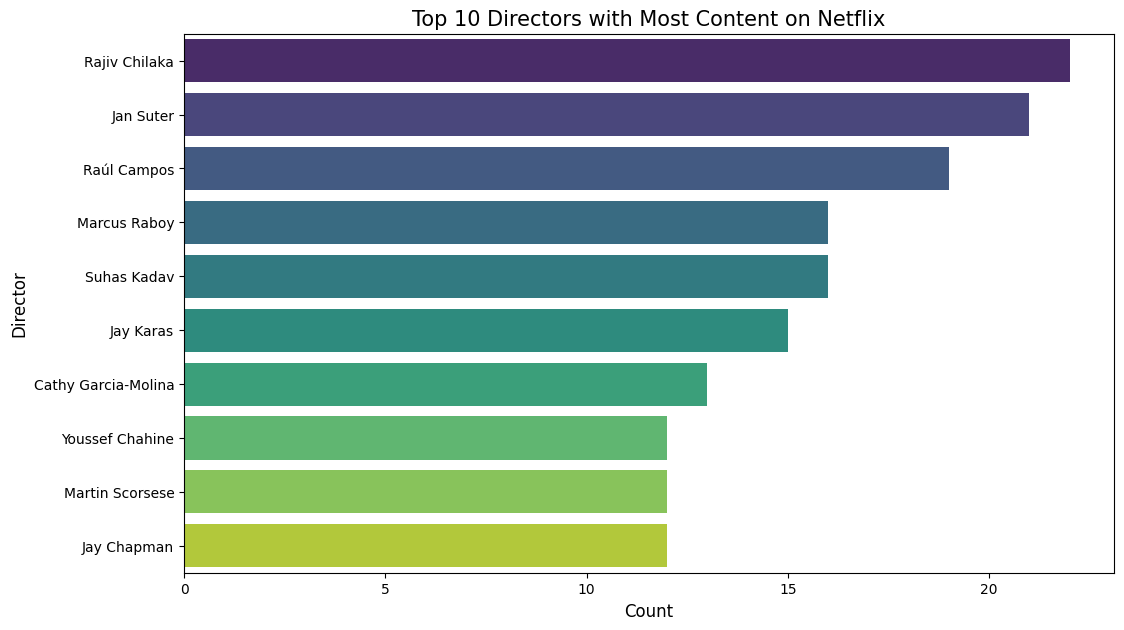

In [18]:
# 15. Directors with Most Content
director_data = netflix_data[netflix_data['director'].notna()]
director_data['director_split'] = director_data['director'].str.split(', ')
director_exploded = director_data.explode('director_split')

# Count content by director
director_counts = director_exploded['director_split'].value_counts().reset_index()
director_counts.columns = ['Director', 'Count']
director_counts = director_counts.head(10)  # Top 10 directors

# Plot top 10 directors
plt.figure(figsize=(12, 7))
sns.barplot(data=director_counts, x='Count', y='Director', palette='viridis')
plt.title('Top 10 Directors with Most Content on Netflix', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()